In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import tensorflowjs as tfjs

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [5]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_valid = x_valid.reshape((x_valid.shape[0], 28, 28, 1))
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_valid = tf.keras.utils.normalize(x_valid, axis=1)
y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(min_delta=.001,
                               restore_best_weights=True,
                               patience=20,
                               verbose=1)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [10]:
history = model.fit(x_train,y_train,
          epochs=1000,
          validation_data=(x_valid, y_valid),
          callbacks=[early_stopping])

Epoch 1/1000
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1829 - accuracy: 0.9431 - val_loss: 0.0383 - val_accuracy: 0.9877
Epoch 2/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0694 - accuracy: 0.9797 - val_loss: 0.0325 - val_accuracy: 0.9894
Epoch 3/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 4/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0441 - accuracy: 0.9870 - val_loss: 0.0229 - val_accuracy: 0.9926
Epoch 5/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0379 - accuracy: 0.9888 - val_loss: 0.0251 - val_accuracy: 0.9937
Epoch 6/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0248 - val_accuracy: 0.9929
Epoch 7/1000
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0

In [11]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9952


[0.016630304977297783, 0.995199978351593]

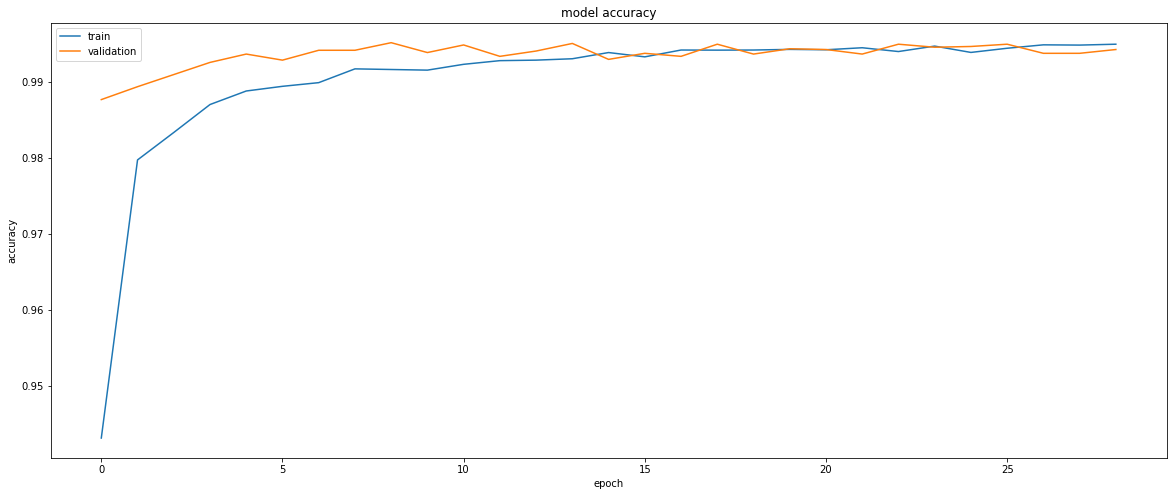

<Figure size 432x288 with 0 Axes>

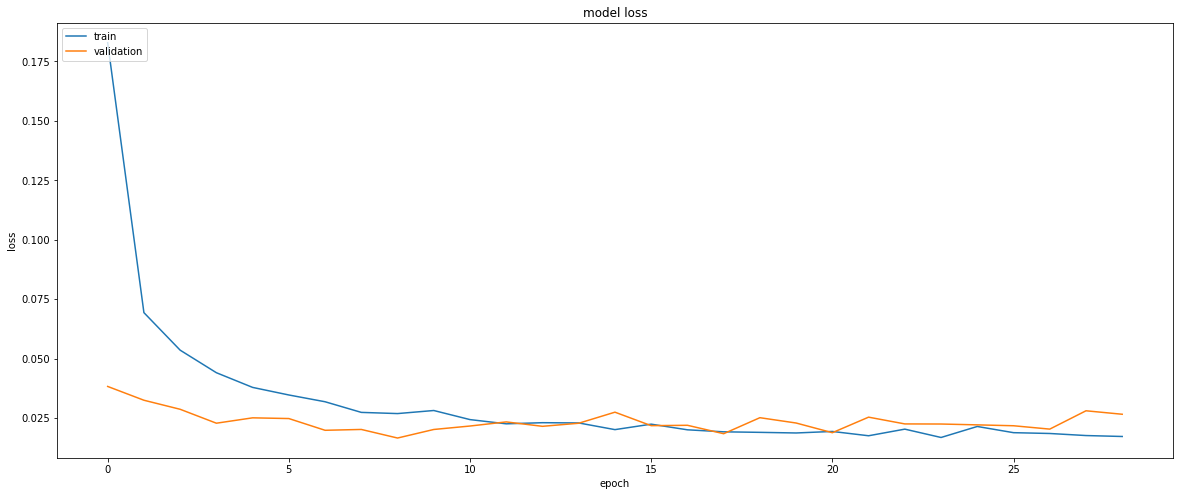

In [18]:
plt.figure(figsize = (20, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize = (20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
model.save('python_result.model')

INFO:tensorflow:Assets written to: python_result.model/assets


In [14]:
tfjs.converters.save_keras_model(model, 'tfjs-model')